**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [1]:
import torch
import numpy as np

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
# Перетворення numpy масивів на тензори PyTorch
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Виведення результату
print("Inputs Tensor:")
print(inputs_tensor)

print("\nTargets Tensor:")
print(targets_tensor)

Inputs Tensor:
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

Targets Tensor:
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [4]:
torch.random.manual_seed(1)

In [5]:
# Ініціація ваг w і зсуву b
w = torch.randn(3, 1)  # Ваги для кожної ознаки (3 ознаки -> розмір 3x1)
b = torch.randn(1)     # Зсув (скаляр)

# Виведення ініційованих ваг і зсуву
print("Weights (w):")
print(w)

print("\nBias (b):")
print(b)

Weights (w):
tensor([[0.6614],
        [0.2669],
        [0.0617]])

Bias (b):
tensor([0.6213])


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [6]:
import torch

# Функція сигмоїди для логістичної регресії
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Функція моделі логістичної регресії
def model(x, w, b):
    # Лінійна комбінація ваг і вхідних даних плюс зсув
    z = torch.matmul(x, w) + b
    # Обчислення ймовірності за допомогою сигмоїди
    return sigmoid(z)

# Фіксація random_seed
torch.random.manual_seed(1)

# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Перетворення на тензор
inputs_tensor = torch.from_numpy(inputs)

# Ініціація ваг w і зсуву b
w = torch.randn(3, 1)  # Ваги для кожної ознаки (3 ознаки -> розмір 3x1)
b = torch.randn(1)     # Зсув (скаляр)

# Використання функції model для обчислення передбачень
predictions = model(inputs_tensor, w, b)

# Виведення результатів передбачення
print("Predictions:")
print(predictions)

Predictions:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])


Передбачення, де всі результати дорівнюють 1, викликають підозри, адже логістична регресія повинна повертати ймовірності, що коливаються в діапазоні від 0 до 1. Якщо всі значення рівні 1, це свідчить про те, що модель завжди впевнена, що кожен приклад належить до позитивного класу.

Можливі причини такого результату:
1) Значні ваги або дуже великі вхідні значення. Якщо ваги w або вхідні значення мають занадто великі значення, тоді лінійна комбінація z = torch.matmul(x, w) + b стає занадто великою, що робить значення сигмоїдної функції близькими до 1 (так як sigmoid(z) прямує до 1 при великих значеннях z).

2) Випадкове ініціювання ваг. Оскільки ваги ініційовані випадковими значеннями, вони можуть бути надто великими або надто малими. Це впливає на результат передбачень, які на початку можуть бути некоректними, тому потрібно тренувати модель для коректного налаштування ваг.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [7]:
# Функція для обчислення бінарної крос-ентропії
def binary_cross_entropy(predicted_probs, true_labels):
    # Додаємо epsilon до аргументів log для уникнення log(0)
    epsilon = 1e-8
    predicted_probs = torch.clamp(predicted_probs, epsilon, 1 - epsilon)

    # Обчислення бінарної крос-ентропії для кожного екземпляра
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))

    # Повертаємо середнє значення втрат по всьому набору даних
    return torch.mean(loss)

# Фіксація random_seed
torch.random.manual_seed(1)

# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

# Перетворення на тензор
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Ініціація ваг w і зсуву b
w = torch.randn(3, 1)  # Ваги для кожної ознаки (3 ознаки -> розмір 3x1)
b = torch.randn(1)     # Зсув (скаляр)

# Функція моделі
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def model(x, w, b):
    z = torch.matmul(x, w) + b
    return sigmoid(z)

# Обчислення передбачень
predictions = model(inputs_tensor, w, b)

# Обчислення втрат за допомогою функції binary_cross_entropy
loss = binary_cross_entropy(predictions, targets_tensor)

# Виведення втрат
print("Binary Cross-Entropy Loss:")
print(loss)

Binary Cross-Entropy Loss:
tensor(nan)


In [8]:
# Функція для обчислення бінарної крос-ентропії
def binary_cross_entropy(predicted_probs, true_labels):
    # Додаємо epsilon до аргументів log для уникнення log(0)
    epsilon = 1e-6  # Збільшуємо epsilon для більшої стабільності
    predicted_probs = torch.clamp(predicted_probs, epsilon, 1 - epsilon)

    # Обчислення бінарної крос-ентропії для кожного екземпляра
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))

    # Повертаємо середнє значення втрат по всьому набору даних
    return torch.mean(loss)

# Фіксація random_seed
torch.random.manual_seed(1)

# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

# Перетворення на тензор
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Ініціація ваг w і зсуву b
w = torch.randn(3, 1)  # Ваги для кожної ознаки (3 ознаки -> розмір 3x1)
b = torch.randn(1)     # Зсув (скаляр)

# Функція моделі
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def model(x, w, b):
    z = torch.matmul(x, w) + b
    return sigmoid(z)

# Обчислення передбачень
predictions = model(inputs_tensor, w, b)

# Обчислення втрат за допомогою функції binary_cross_entropy
loss = binary_cross_entropy(predictions, targets_tensor)

# Виведення втрат
print("Binary Cross-Entropy Loss:")
print(loss)

Binary Cross-Entropy Loss:
tensor(5.5209)


5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [10]:
import torch

# Функція для обчислення бінарної крос-ентропії
def binary_cross_entropy(predicted_probs, true_labels):
    epsilon = 1e-6  # Щоб уникнути log(0)
    predicted_probs = torch.clamp(predicted_probs, epsilon, 1 - epsilon)
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))
    return torch.mean(loss)

# Фіксація random_seed
torch.random.manual_seed(1)

# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

# Перетворення на тензор
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Ініціація ваг w і зсуву b з requires_grad=True для автоматичного обчислення градієнтів
w = torch.randn(3, 1, requires_grad=True)  # Ваги для кожної ознаки (3 ознаки -> розмір 3x1)
b = torch.randn(1, requires_grad=True)     # Зсув (скаляр)

# Функція моделі
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def model(x, w, b):
    z = torch.matmul(x, w) + b
    return sigmoid(z)

# Обчислення передбачень
predictions = model(inputs_tensor, w, b)

# Обчислення втрат за допомогою функції binary_cross_entropy
loss = binary_cross_entropy(predictions, targets_tensor)

# Зворотнє поширення помилки для обчислення градієнтів
loss.backward()

# Виведення градієнтів для w і b
print("Gradients for weights (w):")
print(w.grad)

print("\nGradient for bias (b):")
print(b.grad)


Gradients for weights (w):
tensor([[0.],
        [0.],
        [0.]])

Gradient for bias (b):
tensor([0.])


Градієнти для ваг та зсуву рівні нулю, означають, що під час зворотного поширення помилки не було внесено жодних змін до параметрів. Це проблема, і вона може бути викликана кількома причинами:

1) Передбачення занадто близькі до 0 або 1. Якщо всі передбачення моделі надто близькі до 1 (як це було раніше, коли всі значення передбачень були рівні 1), то похідна логістичної функції (сигмоїди) стає дуже малою або навіть рівною нулю. Це викликає проблему з обчисленням градієнтів, оскільки градієнти функції втрат по цих параметрах будуть близькі до нуля або рівні нулю.

2) Неправильне обчислення втрат або передбачень. Якщо модель робить дуже погані передбачення або функція втрат обчислена неправильно, це також може призвести до того, що градієнти будуть рівні нулю.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [11]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [13]:
def model(x, w, b):
    z = torch.matmul(x, w.T) + b  # Транспонуємо w
    return sigmoid(z)


In [14]:
# Обчислення передбачень
predictions = model(inputs_tensor, w, b)

# Обчислення втрат
loss = binary_cross_entropy(predictions, targets_tensor)

# Зворотнє поширення помилки для обчислення градієнтів
loss.backward()

# Виведення передбачень, втрат і градієнтів
print("Predictions:")
print(predictions)

print("\nLoss:")
print(loss)

print("\nGradients for weights (w):")
print(w.grad)

print("\nGradient for bias (b):")
print(b.grad)


Predictions:
tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)

Loss:
tensor(0.6829, grad_fn=<MeanBackward0>)

Gradients for weights (w):
tensor([[ -5.4417, -18.9853, -10.0682]])

Gradient for bias (b):
tensor([-0.0794])


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [15]:
# Налаштування параметрів
learning_rate = 0.01
num_epochs = 1000

# Головний цикл навчання
for epoch in range(num_epochs):
    # Генерація прогнозів
    predictions = model(inputs_tensor, w, b)

    # Обчислення втрат
    loss = binary_cross_entropy(predictions, targets_tensor)

    # Обчислення градієнтів
    loss.backward()

    # Оновлення ваг і зсуву
    with torch.no_grad():  # Вимкнення обчислення градієнтів
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Скидання градієнтів на нуль
    w.grad.zero_()
    b.grad.zero_()

# Обчислення фінальних прогнозів
final_predictions = model(inputs_tensor, w, b)

# Перетворення ймовірностей на класи (0 або 1)
final_predictions_classes = (final_predictions > 0.5).float()

# Виведення фінальних прогнозів і втрат
print("Final Predictions:")
print(final_predictions_classes)

print("\nFinal Loss:")
print(loss)

# Аналіз точності
accuracy = (final_predictions_classes.eq(targets_tensor).sum().item()) / targets_tensor.size(0)
print("\nAccuracy:")
print(accuracy)


Final Predictions:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

Final Loss:
tensor(5.5209, grad_fn=<MeanBackward0>)

Accuracy:
0.6


Всі передбачення моделі — це 1, що вказує на те, що модель не може правильно розрізнити класи. Це може бути наслідком того, що модель не навчилася відрізняти ознаки класів через недостатнє навчання або невідповідну ініціалізацію ваг.

Значення втрат досить високе, що свідчить про те, що модель не може адекватно моделювати дані. Ідеальне значення втрат має бути наближеним до 0.

Точність 60% є невисокою, особливо для бінарної класифікації. Це означає, що модель правильно класифікує лише 3 з 5 прикладів, що вказує на те, що модель не є надійною.

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [16]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [18]:
from torch.utils.data import TensorDataset

# Перетворення на тензори
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Створення датасету
dataset = TensorDataset(inputs_tensor, targets_tensor)

# Виведення перших 3 елементів датасету
for i in range(3):
    print(f'Element {i+1}: {dataset[i]}')

Element 1: (tensor([73., 67., 43.]), tensor([0.]))
Element 2: (tensor([91., 88., 64.]), tensor([1.]))
Element 3: (tensor([ 87., 134.,  58.]), tensor([1.]))


8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [19]:
import torch
from torch.utils.data import DataLoader

# Припускаємо, що train_ds - це наш раніше створений датасет
# Створення DataLoader
batch_size = 5
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Виведення першого елемента з DataLoader
for i, (inputs, targets) in enumerate(train_loader):
    print(f'Batch {i + 1}:')
    print('Inputs:', inputs)
    print('Targets:', targets)
    break  # Вийти після першого батчу

Batch 1:
Inputs: tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.]])
Targets: tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [20]:
import torch
import torch.nn as nn

# Визначення класу LogReg для логістичної регресії
class LogReg(nn.Module):
    def __init__(self):
        super(LogReg, self).__init__()
        # Лінійний шар з 3 входами і 1 виходом
        self.linear = nn.Linear(3, 1)
        # Функція активації сигмоїд
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Прямий прохід: лінійний шар + сигмоїд
        return self.sigmoid(self.linear(x))

# Створення екземпляра класу LogReg
model = LogReg()

# Виведення структури моделі
print(model)


LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [21]:
import torch
import torch.optim as optim
import torch.nn.functional as F

# Припускаємо, що inputs_tensor та targets_tensor вже визначені
# Створення екземпляра моделі
model = LogReg()

# Визначення оптимізатора
learning_rate = 0.01
opt = optim.SGD(model.parameters(), lr=learning_rate)

# Обчислення передбачень
predictions = model(inputs_tensor)

# Обчислення втрат
loss = F.binary_cross_entropy(predictions, targets_tensor)

# Виведення втрат
print('Loss:', loss.item())

# Висновок про навчання моделі
if loss.item() < 0.5:  # Припустимо, що втрати менше 0.5 свідчать про хорошу модель
    print("Модель навилась добре.")
else:
    print("Модель потребує покращення.")


Loss: 40.0
Модель потребує покращення.


11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

Epoch [100/1000], Loss: 36.6641
Epoch [200/1000], Loss: 36.6641
Epoch [300/1000], Loss: 36.6641
Epoch [400/1000], Loss: 36.6641
Epoch [500/1000], Loss: 36.6641
Epoch [600/1000], Loss: 36.6641
Epoch [700/1000], Loss: 36.6641
Epoch [800/1000], Loss: 36.6641
Epoch [900/1000], Loss: 36.6641
Epoch [1000/1000], Loss: 36.6641


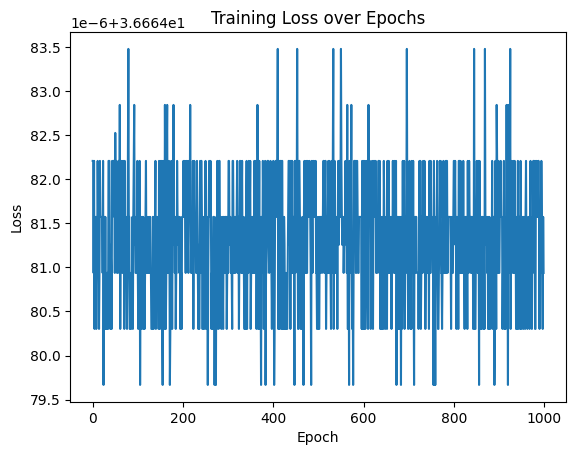

Final Predictions:
 [[1.3237716e-19]
 [2.3892191e-25]
 [1.0909814e-31]
 [1.9977295e-18]
 [9.3086169e-25]
 [1.3237716e-19]
 [2.3892191e-25]
 [1.0909814e-31]
 [1.9977295e-18]
 [9.3086169e-25]
 [1.3237716e-19]
 [2.3892191e-25]
 [1.0909814e-31]
 [1.9977295e-18]
 [9.3086169e-25]]
Targets:
 [[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [23]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

# Перетворення в тензори PyTorch
inputs_tensor = torch.tensor(inputs)
targets_tensor = torch.tensor(targets)

# Створення датасету
train_ds = TensorDataset(inputs_tensor, targets_tensor)

# Створення DataLoader
train_dl = DataLoader(train_ds, batch_size=5, shuffle=True)

# Визначення класу LogReg
class LogReg(nn.Module):
    def __init__(self):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# Створення екземпляра моделі
model = LogReg()

# Визначення оптимізатора
learning_rate = 0.01
opt = optim.SGD(model.parameters(), lr=learning_rate)

# Модифікована функція fit для відстеження втрат
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

# Навчання моделі
loss_fn = F.binary_cross_entropy
losses = fit_return_loss(1000, model, loss_fn, opt, train_dl)

# Візуалізація втрат
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Обчислення фінальних передбачень
final_predictions = model(inputs_tensor).detach().numpy()

# Виведення фінальних передбачень та таргетів
print('Final Predictions:\n', final_predictions)
print('Targets:\n', targets)
